In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import re
import warnings
warnings.filterwarnings("ignore")
path ='/content/drive/MyDrive/Colab Notebooks/NLP_YOUTUBE_Data/Dataset and Notebook/' 
stopwords_list = path+'book_stopwords.txt'

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/NLP_YOUTUBE_Data/Dataset and Notebook/BookReviews.xlsx")

In [ ]:
data=data[['Review','Sentiment']]
data.head()

,Review,Sentiment
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative


In [ ]:
data.tail()

,Unnamed: 0,Review,Sentiment
1439,1439,আলহামদুলিল্লাহ্‌ খুব ভাল একটি বই। শেখার আছে অন...,1
1440,1440,একটু আগে পড়ে শেষ করলাম ।কাহিনী টা আমার কাছে দা...,1
1441,1441,মুক্তি যুদ্ধ সম্পর্কে পড়া আমার সেরা বই। অনেক ক...,1
1442,1442,আশাকরি ভালো একটা বই পাবো এইভাবেই এই অনুবাদকের ...,1
1443,1443,নবীন প্রোগ্রামারদের জন্যে অসাধারন একটা বই। আমি...,1


In [ ]:
# Read the data and take only 1000 Reviews
#data = pd.read_excel(path+'BookReviews.xlsx')[:1000]
data.Sentiment = data.Sentiment.replace({1:'Positive',0:'Negative'})
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Sentiment =='Positive']),
      "\nTotal Negative Reviews:",len(data[data.Sentiment=='Negative']))

Total Reviews: 1444 
Total Positive Reviews: 972 
Total Negative Reviews: 472


# Understanding Features and Target Variables

In [ ]:
data['Sentiment'].unique()

array(['Negative', 'Positive'], dtype=object)

In [ ]:
data.shape

(1444, 3)

In [ ]:
data.dtypes

Unnamed: 0     int64
Review        object
Sentiment     object
dtype: object

# Checking for NULL values

In [ ]:
data.isnull().any()

Unnamed: 0    False
Review        False
Sentiment     False
dtype: bool

# Countplot of Target Variable(Category)

In [ ]:
data.Sentiment

0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
1439    Positive
1440    Positive
1441    Positive
1442    Positive
1443    Positive
Name: Sentiment, Length: 1444, dtype: object

<Axes: ylabel='count'>

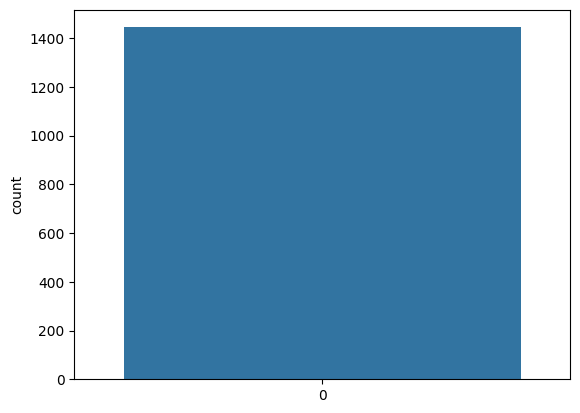

In [ ]:
sns.countplot(data.Sentiment)

In [ ]:
data['Review_length'] = data['Review'].str.len()
print(data['Review_length'])

0       779
1        30
2       216
3       172
4       104
       ... 
1439    174
1440    260
1441     94
1442     61
1443    283
Name: Review_length, Length: 1444, dtype: int64


# Distribution Plot

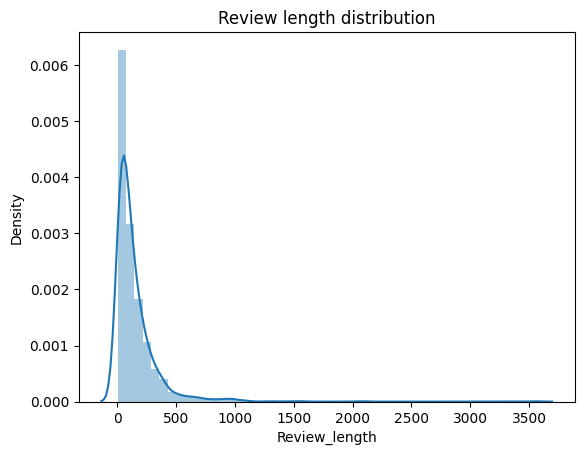

In [ ]:
sns.distplot(data['Review_length']).set_title('Review length distribution');


# WordCloud

In [ ]:
!pip install python-bidi
!pip install wordcloud bnlp_toolkit
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from bidi.algorithm import get_display
import numpy as np
import pandas as pd
import cv2
import re
from bnlp.corpus import stopwords, punctuations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 56.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=2dfc05c2d20af51bd59664739a536c4ed96b9d04027c8d3445c7506e621cb09f
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
--2023-05-30 21:06:03--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def clean(text):
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    
    return text
def refine(df):
  cleaned_text = df.apply(lambda x: clean(str(x)))
  refined_sentence = " ".join(cleaned_text)
  return refined_sentence 

In [ ]:
def create_wordcloud(refine_sentence):
  regex = r"[\u0980-\u09FF]+"

  wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110 ,background_color=None, colormap="hsv",
                 font_path="kalpurush.ttf", regexp=regex).generate(refine_sentence)

  plt.figure(figsize=(15, 7))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()


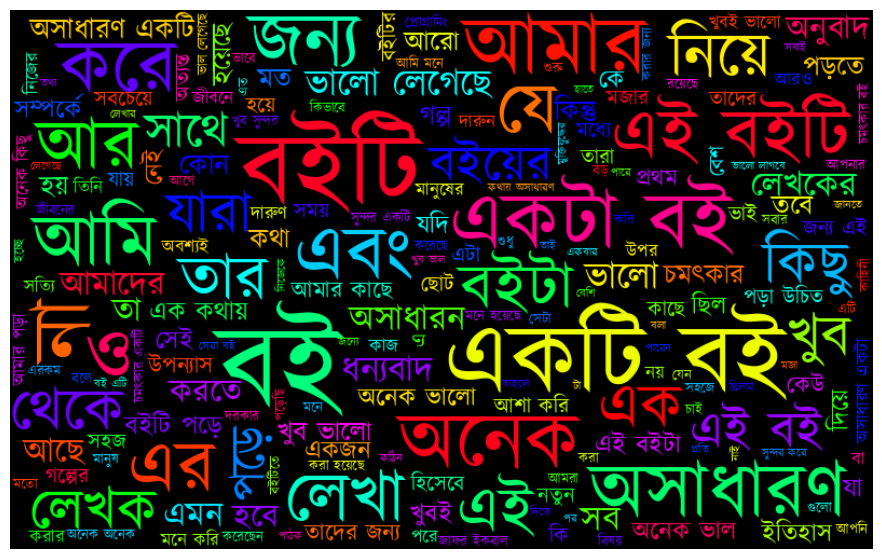

In [ ]:
subset=data[data.Sentiment==1]
#print(subset)
text=subset.Review
#print(text)
clean_text=refine(text)
create_wordcloud(clean_text)

0      বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...
1                         ফালতু বই। শুধু শুধু টাকা নষ্ট।
2      একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...
3      এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...
4      প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...
                             ...                        
467                                   মোটেও ভালো লাগেনি।
468                     বাজে বাইন্ডিং। অসংখ্য বানান ভুল।
469    বইটিতে বানানভুল আরো কম থাকলে ভাল হতো। কিছু জায...
470    বাজে অনুবাদ। যেটা খুব সহজ শব্দে অনুবাদ করা যায়...
471    পৃথিবীর প্রথম শ্রেণীর ফালতু বই গুলার একটা। প্র...
Name: Review, Length: 472, dtype: object


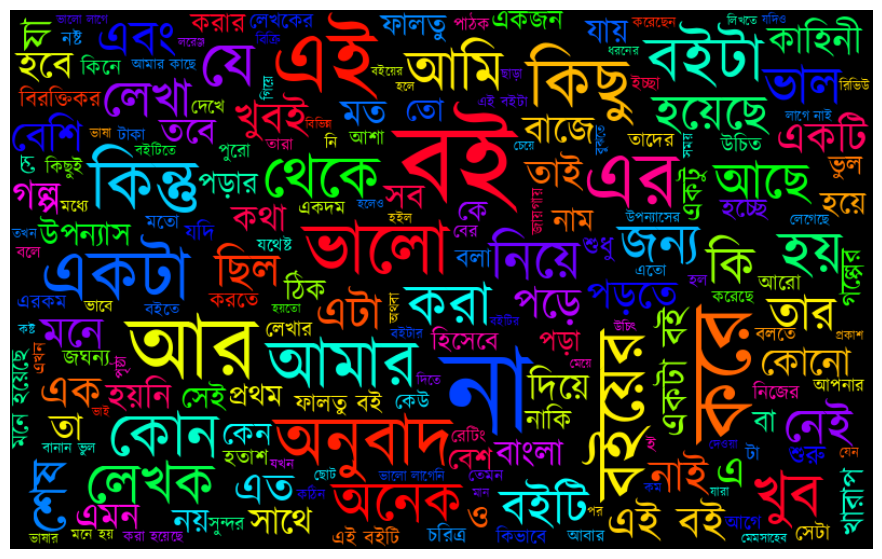

In [ ]:
subset=data[data.Sentiment==0]
#print(subset)
text=subset.Review
print(text)
clean_text=refine(text)
create_wordcloud(clean_text)

# Feature Engineering

Removing the special characters<br>
1) \r<br>
2) \n<br>

Removing Punctuations and Stopwords

In [ ]:
def stopwords_info(filename):
    """
    This function will create a stopwords list from the (.txt) file. 
    
    Args:
        filename: str
        
    Returns:
        stp: list of stopwords
        num_of_words: int
    """
    stp = open(filename,'r',encoding='utf-8').read().split()
    num_of_stopwords = len(stp)
    return stp,num_of_stopwords

def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    text= re.sub('[^\u0980-\u09FF]',' ',str(text)) #removing unnecessary punctuation
    
    stop_words,num_of_stopwords =stopwords_info(stopwords_list) 
    #print(stop_words)
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [ ]:
data['clean_Review'] = data['Review'].apply(process_text)

In [ ]:
data.head()

,Unnamed: 0,Review,Sentiment,clean_Review
0,0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative,বই ট আমর সগরহ আছ এব ত আম পড়ছ বই ট সমপরক যদ এক ...
1,1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative,ফলত বই শধ শধ টক নষট
2,2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative,একট পড় দখত বলসল একট পড়লম তরপর হড়হড় কর বম কর দল...
3,3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative,এট কন বই ছ ধকর জনয় পরশসনর নজর দয় উচৎ কন বই ২১ ...
4,4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative,পরয় রকমরকম দয় কর বইট আপনদর ওয়বসইট থক সরয় ফলন ব...


In [ ]:
sample_data = [10,100,150,200,250,300,350,400,450,500,600,650,700,750,800]
for i in sample_data:
      print('Original:\n',data.Review[i],'\nCleaned:\n',data.clean_Review[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')  

Original:
 দয়া করে কোনো বাঙালি বইটি কিনবেন না। দেশকে ভালবাসলে ভাষাকে ভালবাসলে বইটিকে বর্জন করুন। 
Cleaned:
 দয় কর কন বঙল বইট কনবন ন দশক ভলবসল ভষক ভলবসল বইটক বরজন করন 
 Sentiment:--  Negative 

Original:
 অনুবাদ এর মান আরো ভালো করা উচিত ছিল।😔 
Cleaned:
 অনবদ মন ভল কর উচত ছল 
 Sentiment:--  Negative 

Original:
 ফালতু লুতুপুতু প্রেমকাহিনী 
Cleaned:
 ফলত লতপত পরমকহন 
 Sentiment:--  Negative 

Original:
 পড়তেই কষ্ট হয় 
Cleaned:
 পড়তই কষট হয় 
 Sentiment:--  Negative 

Original:
 শংকরের বিখ্যাত এই বইটা অবশেষে শেষ করলাম । বেশ দীর্ঘ সময় নিয়ে পড়ে শেষ করতে হয়েছে এটা । আমার কাছে মনে হয়েছে উপন্যাসের শুরুতে লেখক যেরকম আগ্রহ ধরে রাখতে পেরেছেন পরবর্তীতে আর তেমনটা পারেন নি। পুরো বই জুড়ে লেখক সেই একই শাহজাহান হোটেলের বর্ননা দিয়ে যাচ্ছেন তো যাচ্ছেন ই । মাঝে মাঝে মনে হয়েছে বইটা একটা আবাসিক শান শওকত ওয়ালা হোটেলে কর্মরত কোন এক কর্মচারীর ডায়রী। পুরো বইতে লেখক শাহজাহান হোটেলের নাম নিয়েই গেছেন অথচ এই "শাহজাহান" বানানটাই ইচ্ছে করে বার বার শাজাহান লেখেছেন, যেটা কলকাতা কেন্দ্রীক বুদ্ধিজীবী দের স্বভাব বলুন আর নষ্

In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    class_label= [k for k,v in dataset.Sentiment.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Sentiment==label].clean_Review) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
    # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    # Documents per class
        documents.append(len(list(dataset[dataset.Sentiment==label].clean_Review)))
    # Total Word per class
        words.append(len(word_list))
    # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Sentiment==label].clean_Review))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
   
    return documents,words,u_words,class_label
    
data_summary(data)


Class Name :  Positive
Number of Documents:972
Number of Words:20963
Number of Unique Words:4248
Most Frequent Words:

বই	751
বইট	541
একট	509
ভল	400
কর	306
অনক	289
জনয	274
পড়	244
আমর	226
অসধরণ	205

Class Name :  Negative
Number of Documents:472
Number of Words:13308
Number of Unique Words:3429
Most Frequent Words:

বই	290
ন	256
ভল	222
কর	202
একট	167
কন	150
বইট	137
মন	129
হয়	118
নই	104


([972, 472], [20963, 13308], [4248, 3429], ['Positive', 'Negative'])

# Label Encoding

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Sentiment']= label_encoder.fit_transform(data['Sentiment']) 

In [ ]:
data.head()

,Unnamed: 0,Review,Sentiment,clean_Review
0,0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,0,বই ট আমর সগরহ আছ এব ত আম পড়ছ বই ট সমপরক যদ এক ...
1,1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,0,ফলত বই শধ শধ টক নষট
2,2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",0,একট পড় দখত বলসল একট পড়লম তরপর হড়হড় কর বম কর দল...
3,3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,0,এট কন বই ছ ধকর জনয় পরশসনর নজর দয় উচৎ কন বই ২১ ...
4,4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",0,পরয় রকমরকম দয় কর বইট আপনদর ওয়বসইট থক সরয় ফলন ব...


# Split the data in Training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['clean_Review'], 
                                                    data['Sentiment'], 
                                                    test_size=0.2, 
                                                    random_state=8)
print(len(X_train),len(X_test))

1155 289


In [ ]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features =1000

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        #max_df=max_df,
                        #min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)                       
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)


(1155, 1000)
(289, 1000)


# Building Models

Accuracy = 89.62%


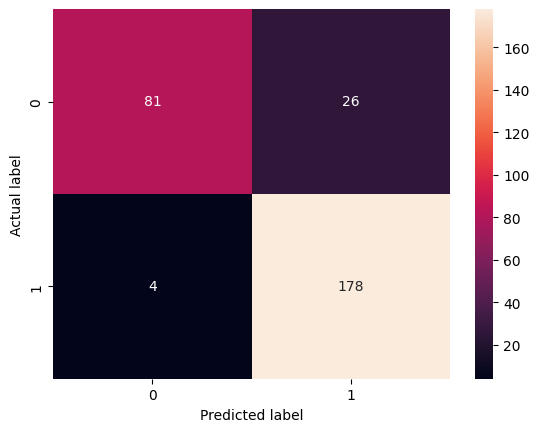

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mul_model = MultinomialNB(alpha=0.15)
mul_model.fit(features_train, labels_train)
pred_y = mul_model.predict(features_test)
print('Accuracy = {0:.2f}%'.format(metrics.accuracy_score(y_test, pred_y)*100))
cm = metrics.confusion_matrix(y_test, pred_y)
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
print(X_test[:8],y_test[:8])
pre_y = mul_model.predict(features_test[:8])
pre_y

74      এত খরপ আনবর জবন পরনই এক পজ একজন মনষর নম তন বনন...
666     বইট পড়ত পর আম খব আননদত রকমরর সরভস অনক ভল দয় পর...
1004    বই ইউনভরসটর কযনটন লখক ড মহমমদ ইবন আবদর রহমন আর...
195     অনবদ এত বজ কউ অত উৎসহ হয় কনত চইল অবশয অনয কথ ক...
517     অসধরণ অভজঞতর ভতর দয় পঠক নজক নতন ভব আবষকর করবন ...
258     কসষকরচছনন একট বই তমম দনয়র যত ধরনর ধরময় কসষকর আ...
126     ফলযপ লখ অনযয় লখক বইট লখত যয় খব আননদ পয়ছন কনত প...
437     হতশ হত হয়ছ ডডপলর মত কমড সপরহর সষট করর ইচছ থকলও...
Name: clean_Review, dtype: object 74      0
666     1
1004    1
195     0
517     1
258     0
126     0
437     0
Name: Sentiment, dtype: int64


array([1, 1, 0, 0, 1, 0, 0, 0])

Accuracy = 55.71%


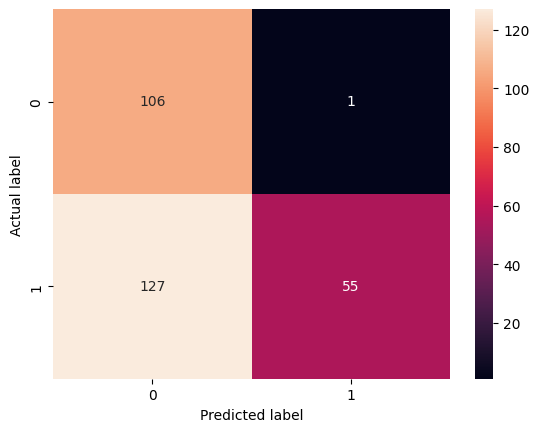

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
model_knn.fit(features_train, labels_train)
pred_y = model_knn.predict(features_test)
print('Accuracy = {0:.2f}%'.format(metrics.accuracy_score(y_test, pred_y)*100))
cm = metrics.confusion_matrix(y_test, pred_y)
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Accuracy = 81.31%


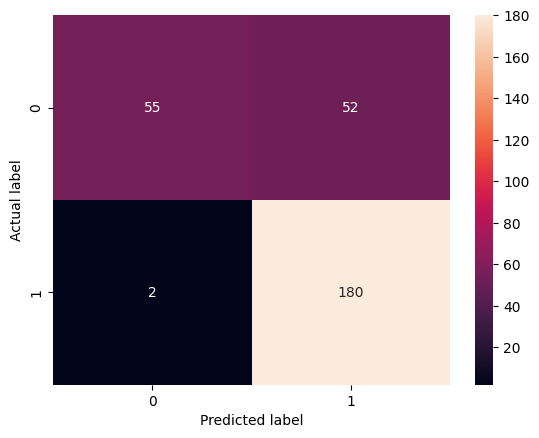

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
model.fit(features_train, labels_train)
pred_y = model.predict(features_test)
print('Accuracy = {0:.2f}%'.format(metrics.accuracy_score(y_test, pred_y)*100))
cm = metrics.confusion_matrix(y_test, pred_y)
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Random Forest

Accuracy = 85.12%


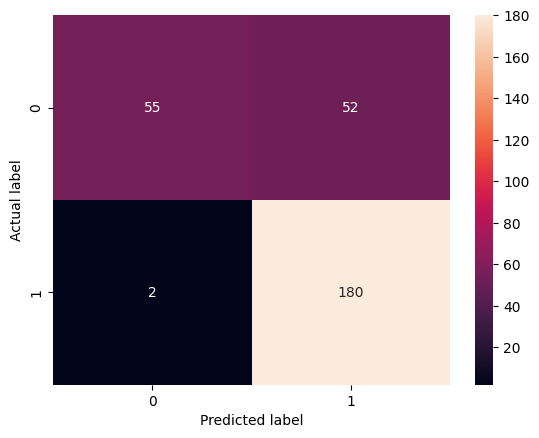

Accuracy:  0.8512110726643599
              precision    recall  f1-score   support

           0       0.89      0.68      0.77       107
           1       0.84      0.95      0.89       182

    accuracy                           0.85       289
   macro avg       0.86      0.82      0.83       289
weighted avg       0.86      0.85      0.85       289



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy = {0:.2f}%'.format(metrics.accuracy_score(y_test, model_predictions)*100))
cm = metrics.confusion_matrix(y_test, pred_y)
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Hyper Paramater Tuning(Random Forest)

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [ ]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

# Logistic Regression

In [ ]:
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



# Hyper Parameter Tuning (Logistic Regression)

In [ ]:
param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


{'C': 1, 'penalty': 'l2'}

In [ ]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



# KNeighborsClassifier

Accuracy remains the same after hyper paramter tuning

In [ ]:
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.912751677852349
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        76
           1       1.00      0.89      0.94        47
           2       0.84      0.89      0.87        55
           3       0.98      0.95      0.97        65
           4       0.84      0.96      0.90        55

    accuracy                           0.91       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298



In [ ]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Hyper Paramaters Tuning (KNeighborsClassifier)

In [ ]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.0s finished


In [ ]:
bestF.best_params_

{'n_neighbors': 7, 'p': 2}

In [ ]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9161073825503355
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       1.00      0.89      0.94        47
           2       0.88      0.91      0.89        55
           3       0.97      0.95      0.96        65
           4       0.83      0.96      0.89        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



# Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7919463087248322
              precision    recall  f1-score   support

           0       0.74      0.75      0.75        76
           1       0.84      0.89      0.87        47
           2       0.78      0.64      0.70        55
           3       0.79      0.92      0.85        65
           4       0.84      0.76      0.80        55

    accuracy                           0.79       298
   macro avg       0.80      0.79      0.79       298
weighted avg       0.79      0.79      0.79       298



In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

# Hyper Paramter Tuning (Decision Tree)

In [ ]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished


In [ ]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3}

In [ ]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7416107382550335
              precision    recall  f1-score   support

           0       0.67      0.66      0.66        76
           1       0.70      0.85      0.77        47
           2       0.73      0.69      0.71        55
           3       0.84      0.78      0.81        65
           4       0.79      0.76      0.78        55

    accuracy                           0.74       298
   macro avg       0.75      0.75      0.75       298
weighted avg       0.74      0.74      0.74       298



# GaussianNB

In [ ]:
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7889273356401384
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       107
           1       0.88      0.77      0.82       182

    accuracy                           0.79       289
   macro avg       0.78      0.80      0.78       289
weighted avg       0.81      0.79      0.79       289



# Doc2Vec

In [ ]:
txt_data= pd.DataFrame()
print(txt_data)

Empty DataFrame
Columns: []
Index: []


In [ ]:
txt_data['Text'] = data['clean_Review']

In [ ]:
txt_data['Category'] = data['Sentiment']

In [ ]:
txt_data.head()

,Text,Category
0,বই ট আমর সগরহ আছ এব ত আম পড়ছ বই ট সমপরক যদ এক ...,0
1,ফলত বই শধ শধ টক নষট,0
2,একট পড় দখত বলসল একট পড়লম তরপর হড়হড় কর বম কর দল...,0
3,এট কন বই ছ ধকর জনয় পরশসনর নজর দয় উচৎ কন বই ২১ ...,0
4,পরয় রকমরকম দয় কর বইট আপনদর ওয়বসইট থক সরয় ফলন ব...,0


In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(txt_data.Text, txt_data.Category, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [ ]:
all_data[0:2]

[TaggedDocument(words=['পছনদর', 'একট', 'বই', 'কলকশন', 'রখর', 'মত'], tags=['Train_0']),
 TaggedDocument(words=['ফলত', 'অনবদ', 'সসকরণ', 'অরজনল', 'বই', 'থক', 'বশষ', 'সব', 'অশই', 'বদ', 'দয়', 'হয়ছ', 'পরট', 'টকই', 'জল', 'গছ', 'বইট', 'কন'], tags=['Train_1'])]

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 1444/1444 [00:00<00:00, 1966420.45it/s]


In [ ]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

# Logistic Regression

In [ ]:
model = LogisticRegression(n_jobs=1, C=1e5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8179723502304147
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       138
           1       0.88      0.84      0.86       296

    accuracy                           0.82       434
   macro avg       0.79      0.80      0.80       434
weighted avg       0.82      0.82      0.82       434



In [ ]:
model = GaussianNB()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.7142857142857143
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       138
           1       0.79      0.79      0.79       296

    accuracy                           0.71       434
   macro avg       0.67      0.67      0.67       434
weighted avg       0.72      0.71      0.71       434



# Random Forest

In [ ]:
model = RandomForestClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8571428571428571
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       138
           1       0.86      0.94      0.90       296

    accuracy                           0.86       434
   macro avg       0.85      0.81      0.83       434
weighted avg       0.86      0.86      0.85       434



# Hyper Parameter Tuning (Random Forest)

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.7min finished


In [ ]:
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [ ]:
model = RandomForestClassifier(max_depth=15,min_samples_leaf=1,min_samples_split=2,n_estimators=1200)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9194630872483222
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       103
           1       0.96      0.89      0.92        89
           2       0.93      0.85      0.89        81
           3       0.90      0.98      0.94        97
           4       0.99      0.87      0.92        77

    accuracy                           0.92       447
   macro avg       0.93      0.91      0.92       447
weighted avg       0.92      0.92      0.92       447



# Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.43847874720357943
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       103
           1       0.49      0.48      0.49        89
           2       0.41      0.36      0.38        81
           3       0.46      0.47      0.47        97
           4       0.34      0.42      0.37        77

    accuracy                           0.44       447
   macro avg       0.44      0.44      0.44       447
weighted avg       0.44      0.44      0.44       447



# Hyper Parameter Tuning (Decision Tree)

In [ ]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.0s finished


In [ ]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 7}

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=7)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.44742729306487694
              precision    recall  f1-score   support

           0       0.58      0.37      0.45       103
           1       0.45      0.51      0.48        89
           2       0.38      0.37      0.38        81
           3       0.45      0.53      0.48        97
           4       0.41      0.47      0.44        77

    accuracy                           0.45       447
   macro avg       0.45      0.45      0.44       447
weighted avg       0.46      0.45      0.45       447



# KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8344519015659956
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       103
           1       0.98      0.73      0.84        89
           2       0.78      0.84      0.81        81
           3       0.71      0.98      0.82        97
           4       0.85      0.83      0.84        77

    accuracy                           0.83       447
   macro avg       0.86      0.83      0.83       447
weighted avg       0.86      0.83      0.84       447



# Hyper Parameter Tuning (KNeighborsClassifier)

In [ ]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:   11.2s finished


In [ ]:
bestF.best_params_

{'n_neighbors': 6, 'p': 2}

In [ ]:
model = KNeighborsClassifier(n_neighbors=6,p=2)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8456375838926175
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       103
           1       0.98      0.72      0.83        89
           2       0.85      0.85      0.85        81
           3       0.70      0.99      0.82        97
           4       0.89      0.88      0.89        77

    accuracy                           0.85       447
   macro avg       0.87      0.85      0.85       447
weighted avg       0.87      0.85      0.85       447

